# Chocolate Sales Analysis - High Level Visualization

This notebook performs comprehensive data preprocessing, exploratory data analysis, and high-level visualizations for the Chocolate Sales dataset.

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('ggplot')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 1. Data Loading

In [19]:
# Load the dataset
df = pd.read_csv('data/Chocolate Sales.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset Shape: (3282, 6)

First few rows:


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


## 2. Data Preprocessing

In [20]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\nData Types:")
print(df.dtypes)

Missing Values:
Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

Data Types:
Sales Person     object
Country          object
Product          object
Date             object
Amount           object
Boxes Shipped     int64
dtype: object


In [21]:
# Preprocess Amount column - remove $ and commas, convert to float
df['Amount'] = df['Amount'].astype(str).str.replace('$', '', regex=False)
df['Amount'] = df['Amount'].str.replace(',', '', regex=False)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

# Create additional useful columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.strftime('%B')
df['Quarter'] = df['Date'].dt.quarter
df['Year_Month'] = df['Date'].dt.to_period('M')

# Calculate revenue per box
df['Revenue_Per_Box'] = df['Amount'] / df['Boxes Shipped']
df['Revenue_Per_Box'] = df['Revenue_Per_Box'].replace([np.inf, -np.inf], np.nan)

print("Preprocessing completed!")
print(f"\nDate range: {df['Date'].min()} to {df['Date'].max()}")
print(f"\nAmount range: ${df['Amount'].min():,.2f} to ${df['Amount'].max():,.2f}")
print(f"\nSample of processed data:")
df.head()

Preprocessing completed!

Date range: 2022-01-03 00:00:00 to 2024-08-31 00:00:00

Amount range: $7.00 to $26,170.95

Sample of processed data:


,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Year,Month,Month_Name,Quarter,Year_Month,Revenue_Per_Box
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.00,180,2022,1,January,1,2022-01,29.56
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.00,94,2022,8,August,3,2022-08,84.00
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.00,91,2022,7,July,3,2022-07,49.46
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.00,342,2022,4,April,2,2022-04,37.21
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.00,184,2022,2,February,1,2022-02,74.38


In [22]:
# Check for any remaining issues
print("Data Quality Check:")
print(f"Total rows: {len(df)}")
print(f"Rows with missing Amount: {df['Amount'].isna().sum()}")
print(f"Rows with missing Date: {df['Date'].isna().sum()}")
print(f"Rows with zero or negative Amount: {(df['Amount'] <= 0).sum()}")
print(f"Rows with zero or negative Boxes Shipped: {(df['Boxes Shipped'] <= 0).sum()}")

# Remove rows with invalid data if any
df_clean = df.dropna(subset=['Amount', 'Date']).copy()
df_clean = df_clean[df_clean['Amount'] > 0].copy()
df_clean = df_clean[df_clean['Boxes Shipped'] > 0].copy()

print(f"\nCleaned dataset rows: {len(df_clean)}")
print(f"Rows removed: {len(df) - len(df_clean)}")

Data Quality Check:
Total rows: 3282
Rows with missing Amount: 0
Rows with missing Date: 0
Rows with zero or negative Amount: 0
Rows with zero or negative Boxes Shipped: 0

Cleaned dataset rows: 3282
Rows removed: 0


## 3. High-Level Exploratory Data Analysis (EDA)

In [23]:
# Basic statistics
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"\nTotal Records: {len(df_clean):,}")
print(f"Date Range: {df_clean['Date'].min().strftime('%B %d, %Y')} to {df_clean['Date'].max().strftime('%B %d, %Y')}")
print(f"Total Revenue: ${df_clean['Amount'].sum():,.2f}")
print(f"Total Boxes Shipped: {df_clean['Boxes Shipped'].sum():,}")
print(f"Average Revenue per Transaction: ${df_clean['Amount'].mean():,.2f}")
print(f"Average Boxes per Transaction: {df_clean['Boxes Shipped'].mean():.2f}")

print("\n" + "=" * 60)
print("UNIQUE COUNTS")
print("=" * 60)
print(f"Unique Sales Persons: {df_clean['Sales Person'].nunique()}")
print(f"Unique Countries: {df_clean['Country'].nunique()}")
print(f"Unique Products: {df_clean['Product'].nunique()}")
print(f"Unique Months: {df_clean['Year_Month'].nunique()}")

DATASET OVERVIEW

Total Records: 3,282
Date Range: January 03, 2022 to August 31, 2024
Total Revenue: $19,791,571.86
Total Boxes Shipped: 540,437
Average Revenue per Transaction: $6,030.34
Average Boxes per Transaction: 164.67

UNIQUE COUNTS
Unique Sales Persons: 25
Unique Countries: 6
Unique Products: 22
Unique Months: 24


In [24]:
# Statistical summary
print("=" * 60)
print("STATISTICAL SUMMARY")
print("=" * 60)
df_clean[['Amount', 'Boxes Shipped', 'Revenue_Per_Box']].describe()

STATISTICAL SUMMARY


,Amount,Boxes Shipped,Revenue_Per_Box
count,3282.00,3282.00,3282.00
mean,6030.34,164.67,111.34
std,4393.98,124.02,295.31
min,7.00,1.00,0.01
25%,2521.49,71.00,15.46
50%,5225.50,137.00,38.19
75%,8556.84,232.00,83.81
max,26170.95,778.00,4692.36


In [25]:
# Top 10 Products by Revenue
print("=" * 60)
print("TOP 10 PRODUCTS BY REVENUE")
print("=" * 60)
top_products = df_clean.groupby('Product')['Amount'].agg(['sum', 'mean', 'count']).sort_values('sum', ascending=False).head(10)
top_products.columns = ['Total Revenue', 'Avg Revenue', 'Transaction Count']
top_products['Total Revenue'] = top_products['Total Revenue'].apply(lambda x: f"${x:,.2f}")
top_products['Avg Revenue'] = top_products['Avg Revenue'].apply(lambda x: f"${x:,.2f}")
print(top_products)

TOP 10 PRODUCTS BY REVENUE
                     Total Revenue Avg Revenue  Transaction Count
Product                                                          
Smooth Sliky Salty   $1,120,201.09   $6,328.82                177
50% Dark Bites       $1,087,659.35   $6,042.55                180
White Choc           $1,054,257.00   $6,058.95                174
Peanut Butter Cubes  $1,036,591.09   $7,051.64                147
Eclairs                $996,947.96   $5,538.60                180
99% Dark & Pure        $960,033.45   $6,530.84                147
85% Dark Bars          $955,268.24   $6,368.45                150
Organic Choco Syrup    $945,345.73   $6,059.91                156
Spicy Special Slims    $938,131.69   $5,790.94                162
Mint Chip Choco        $904,989.55   $6,703.63                135


In [26]:
# Top 10 Countries by Revenue
print("=" * 60)
print("TOP 10 COUNTRIES BY REVENUE")
print("=" * 60)
top_countries = df_clean.groupby('Country')['Amount'].agg(['sum', 'mean', 'count']).sort_values('sum', ascending=False).head(10)
top_countries.columns = ['Total Revenue', 'Avg Revenue', 'Transaction Count']
top_countries['Total Revenue'] = top_countries['Total Revenue'].apply(lambda x: f"${x:,.2f}")
top_countries['Avg Revenue'] = top_countries['Avg Revenue'].apply(lambda x: f"${x:,.2f}")
print(top_countries)

TOP 10 COUNTRIES BY REVENUE
             Total Revenue Avg Revenue  Transaction Count
Country                                                  
Australia    $3,646,444.35   $5,929.18                615
UK           $3,365,388.90   $6,302.23                534
India        $3,343,730.83   $6,057.48                552
USA          $3,313,858.09   $6,171.06                537
Canada       $3,078,495.65   $5,863.80                525
New Zealand  $3,043,654.04   $5,864.46                519


In [27]:
# Top 10 Sales Persons by Revenue
print("=" * 60)
print("TOP 10 SALES PERSONS BY REVENUE")
print("=" * 60)
top_salespersons = df_clean.groupby('Sales Person')['Amount'].agg(['sum', 'mean', 'count']).sort_values('sum', ascending=False).head(10)
top_salespersons.columns = ['Total Revenue', 'Avg Revenue', 'Transaction Count']
top_salespersons['Total Revenue'] = top_salespersons['Total Revenue'].apply(lambda x: f"${x:,.2f}")
top_salespersons['Avg Revenue'] = top_salespersons['Avg Revenue'].apply(lambda x: f"${x:,.2f}")
print(top_salespersons)

TOP 10 SALES PERSONS BY REVENUE
                     Total Revenue Avg Revenue  Transaction Count
Sales Person                                                     
Ches Bonnell         $1,022,599.96   $7,101.39                144
Oby Sorrel           $1,017,204.12   $6,919.76                147
Madelene Upcott      $1,010,028.72   $7,481.69                135
Kelci Walkden        $1,002,929.10   $6,190.92                162
Brien Boise            $997,326.48   $6,272.49                159
Van Tuxwell            $974,425.09   $6,368.79                153
Dennison Crosswaite    $931,849.57   $6,339.11                147
Beverie Moffet         $892,421.37   $5,949.48                150
Kaine Padly            $849,062.76   $6,289.35                135
Marney O'Breen         $836,427.63   $6,195.76                135


## 4. High-Level Visualizations

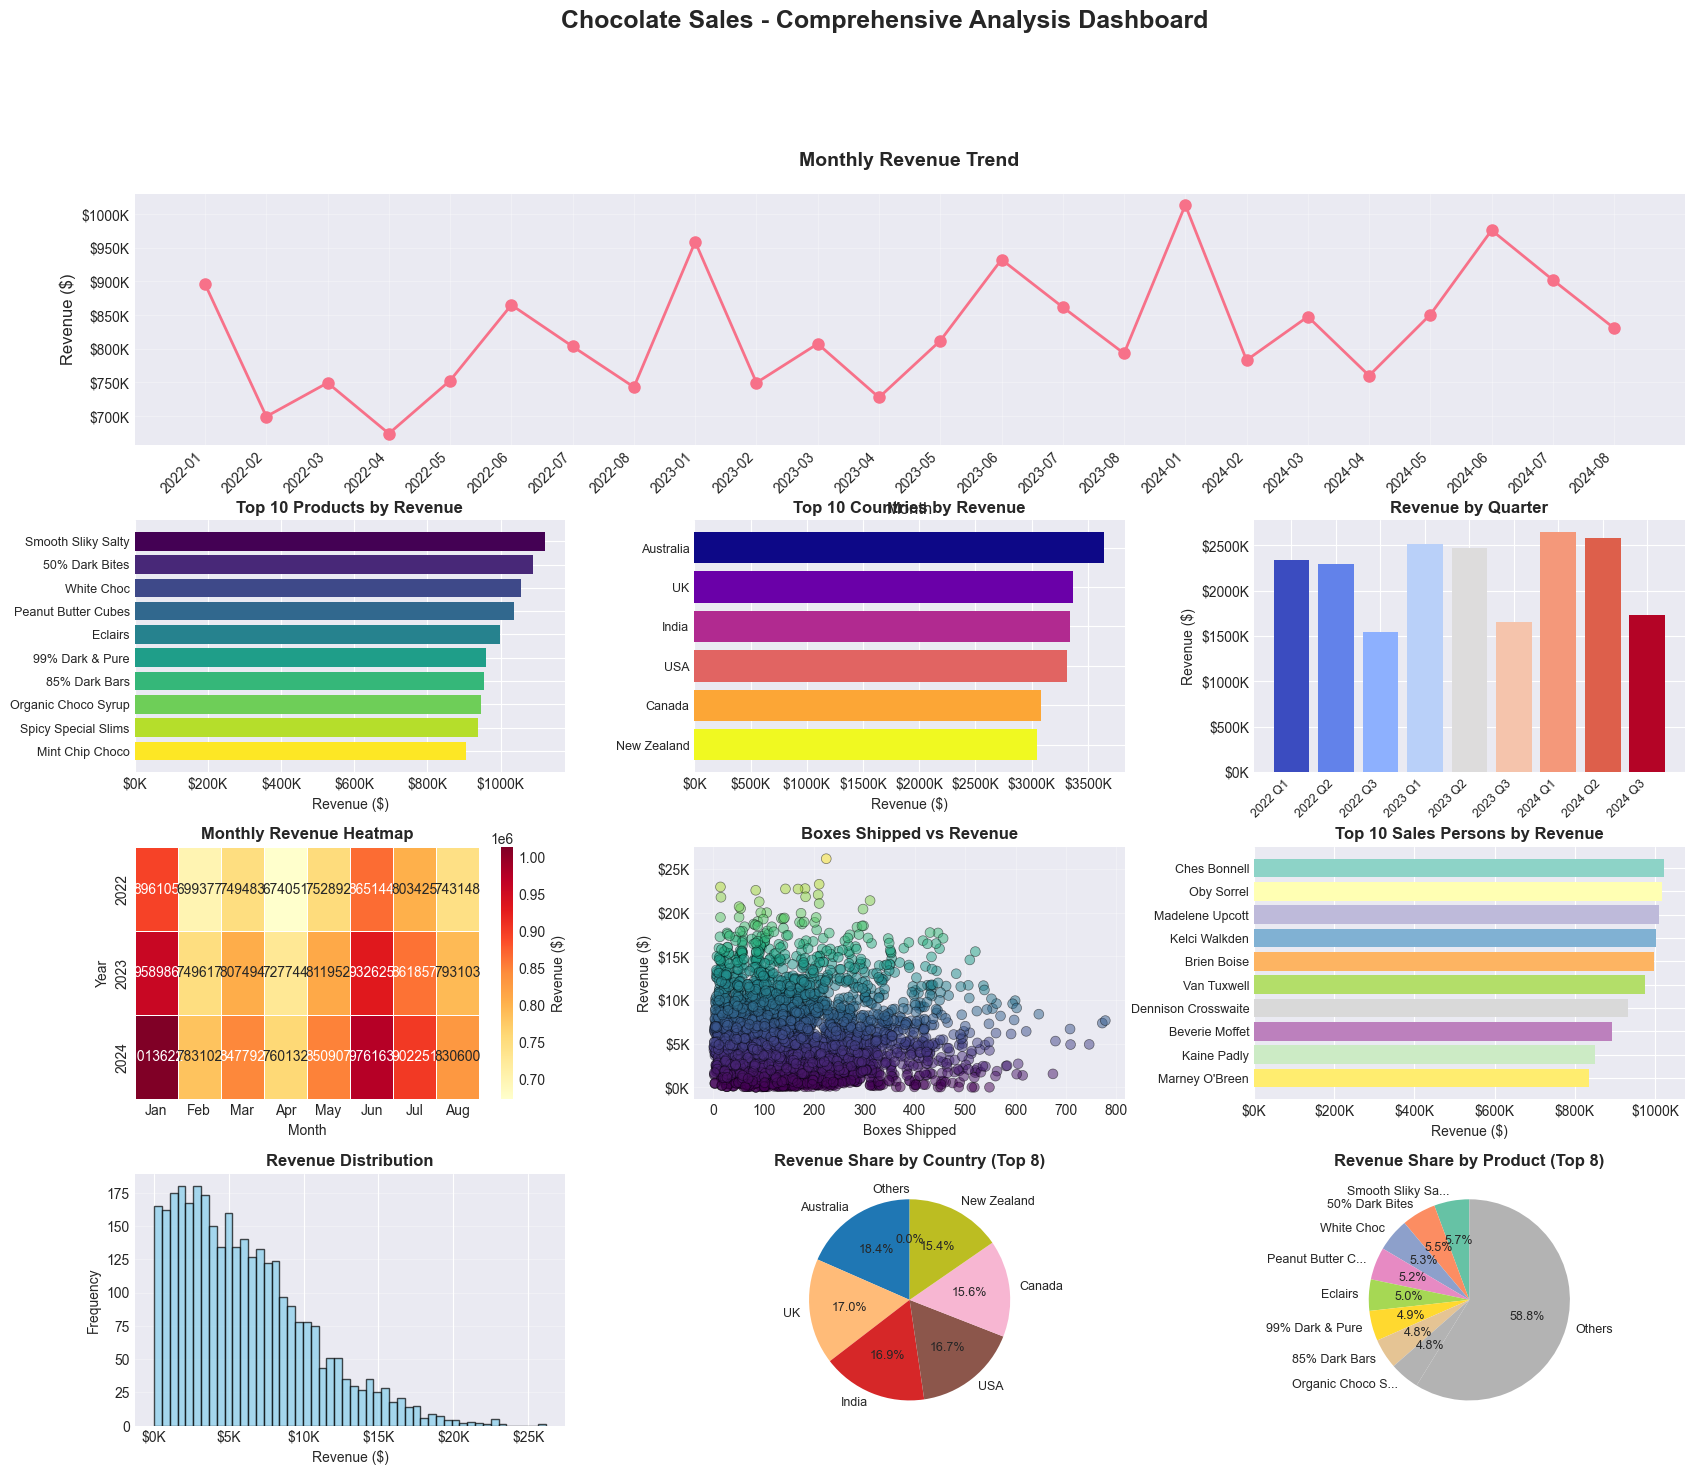

In [28]:
# Set up the plotting style
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

# Create a comprehensive dashboard figure
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(4, 3, hspace=0.3, wspace=0.3)

# 1. Revenue Trend Over Time
ax1 = fig.add_subplot(gs[0, :])
monthly_revenue = df_clean.groupby('Year_Month')['Amount'].sum()
monthly_revenue.index = monthly_revenue.index.astype(str)
ax1.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linewidth=2, markersize=8)
ax1.set_title('Monthly Revenue Trend', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Revenue ($)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# 2. Top 10 Products by Revenue
ax2 = fig.add_subplot(gs[1, 0])
top_10_products = df_clean.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(10)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_products)))
ax2.barh(range(len(top_10_products)), top_10_products.values, color=colors)
ax2.set_yticks(range(len(top_10_products)))
ax2.set_yticklabels([p[:25] + '...' if len(p) > 25 else p for p in top_10_products.index], fontsize=9)
ax2.set_title('Top 10 Products by Revenue', fontsize=12, fontweight='bold')
ax2.set_xlabel('Revenue ($)', fontsize=10)
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax2.invert_yaxis()

# 3. Top 10 Countries by Revenue
ax3 = fig.add_subplot(gs[1, 1])
top_10_countries = df_clean.groupby('Country')['Amount'].sum().sort_values(ascending=False).head(10)
colors = plt.cm.plasma(np.linspace(0, 1, len(top_10_countries)))
ax3.barh(range(len(top_10_countries)), top_10_countries.values, color=colors)
ax3.set_yticks(range(len(top_10_countries)))
ax3.set_yticklabels(top_10_countries.index, fontsize=9)
ax3.set_title('Top 10 Countries by Revenue', fontsize=12, fontweight='bold')
ax3.set_xlabel('Revenue ($)', fontsize=10)
ax3.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax3.invert_yaxis()

# 4. Revenue Distribution by Quarter
ax4 = fig.add_subplot(gs[1, 2])
quarterly_revenue = df_clean.groupby(['Year', 'Quarter'])['Amount'].sum().reset_index()
quarterly_revenue['Quarter_Label'] = quarterly_revenue['Year'].astype(str) + ' Q' + quarterly_revenue['Quarter'].astype(str)
colors = plt.cm.coolwarm(np.linspace(0, 1, len(quarterly_revenue)))
ax4.bar(range(len(quarterly_revenue)), quarterly_revenue['Amount'].values, color=colors)
ax4.set_xticks(range(len(quarterly_revenue)))
ax4.set_xticklabels(quarterly_revenue['Quarter_Label'], rotation=45, ha='right', fontsize=9)
ax4.set_title('Revenue by Quarter', fontsize=12, fontweight='bold')
ax4.set_ylabel('Revenue ($)', fontsize=10)
ax4.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# 5. Monthly Revenue Heatmap
ax5 = fig.add_subplot(gs[2, 0])
monthly_pivot = df_clean.groupby(['Year', 'Month'])['Amount'].sum().reset_index()
monthly_pivot_pivot = monthly_pivot.pivot(index='Year', columns='Month', values='Amount')
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Rename columns to month names
new_columns = {}
for col in monthly_pivot_pivot.columns:
    try:
        if 1 <= int(col) <= 12:
            new_columns[col] = month_names[int(col)-1]
        else:
            new_columns[col] = col
    except (ValueError, TypeError):
        new_columns[col] = col
monthly_pivot_pivot = monthly_pivot_pivot.rename(columns=new_columns)
sns.heatmap(monthly_pivot_pivot, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax5, 
            cbar_kws={'label': 'Revenue ($)'}, linewidths=0.5)
ax5.set_title('Monthly Revenue Heatmap', fontsize=12, fontweight='bold')
ax5.set_xlabel('Month', fontsize=10)
ax5.set_ylabel('Year', fontsize=10)

# 6. Boxes Shipped vs Revenue Scatter
ax6 = fig.add_subplot(gs[2, 1])
ax6.scatter(df_clean['Boxes Shipped'], df_clean['Amount'], alpha=0.5, s=50, c=df_clean['Amount'], 
           cmap='viridis', edgecolors='black', linewidth=0.5)
ax6.set_title('Boxes Shipped vs Revenue', fontsize=12, fontweight='bold')
ax6.set_xlabel('Boxes Shipped', fontsize=10)
ax6.set_ylabel('Revenue ($)', fontsize=10)
ax6.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax6.grid(True, alpha=0.3)

# 7. Top 10 Sales Persons
ax7 = fig.add_subplot(gs[2, 2])
top_10_salespersons = df_clean.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).head(10)
colors = plt.cm.Set3(np.linspace(0, 1, len(top_10_salespersons)))
ax7.barh(range(len(top_10_salespersons)), top_10_salespersons.values, color=colors)
ax7.set_yticks(range(len(top_10_salespersons)))
ax7.set_yticklabels([p[:20] + '...' if len(p) > 20 else p for p in top_10_salespersons.index], fontsize=9)
ax7.set_title('Top 10 Sales Persons by Revenue', fontsize=12, fontweight='bold')
ax7.set_xlabel('Revenue ($)', fontsize=10)
ax7.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax7.invert_yaxis()

# 8. Revenue Distribution
ax8 = fig.add_subplot(gs[3, 0])
ax8.hist(df_clean['Amount'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
ax8.set_title('Revenue Distribution', fontsize=12, fontweight='bold')
ax8.set_xlabel('Revenue ($)', fontsize=10)
ax8.set_ylabel('Frequency', fontsize=10)
ax8.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax8.grid(True, alpha=0.3, axis='y')

# 9. Country Revenue Pie Chart (Top 8)
ax9 = fig.add_subplot(gs[3, 1])
top_8_countries = df_clean.groupby('Country')['Amount'].sum().sort_values(ascending=False).head(8)
other_revenue = df_clean.groupby('Country')['Amount'].sum().sort_values(ascending=False).iloc[8:].sum()
pie_data = list(top_8_countries.values) + [other_revenue]
pie_labels = list(top_8_countries.index) + ['Others']
colors_pie = plt.cm.tab20(np.linspace(0, 1, len(pie_data)))
ax9.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90, colors=colors_pie, textprops={'fontsize': 9})
ax9.set_title('Revenue Share by Country (Top 8)', fontsize=12, fontweight='bold')

# 10. Product Revenue Pie Chart (Top 8)
ax10 = fig.add_subplot(gs[3, 2])
top_8_products = df_clean.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(8)
other_product_revenue = df_clean.groupby('Product')['Amount'].sum().sort_values(ascending=False).iloc[8:].sum()
pie_data_prod = list(top_8_products.values) + [other_product_revenue]
pie_labels_prod = [p[:15] + '...' if len(p) > 15 else p for p in top_8_products.index] + ['Others']
colors_pie_prod = plt.cm.Set2(np.linspace(0, 1, len(pie_data_prod)))
ax10.pie(pie_data_prod, labels=pie_labels_prod, autopct='%1.1f%%', startangle=90, 
         colors=colors_pie_prod, textprops={'fontsize': 9})
ax10.set_title('Revenue Share by Product (Top 8)', fontsize=12, fontweight='bold')

plt.suptitle('Chocolate Sales - Comprehensive Analysis Dashboard', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

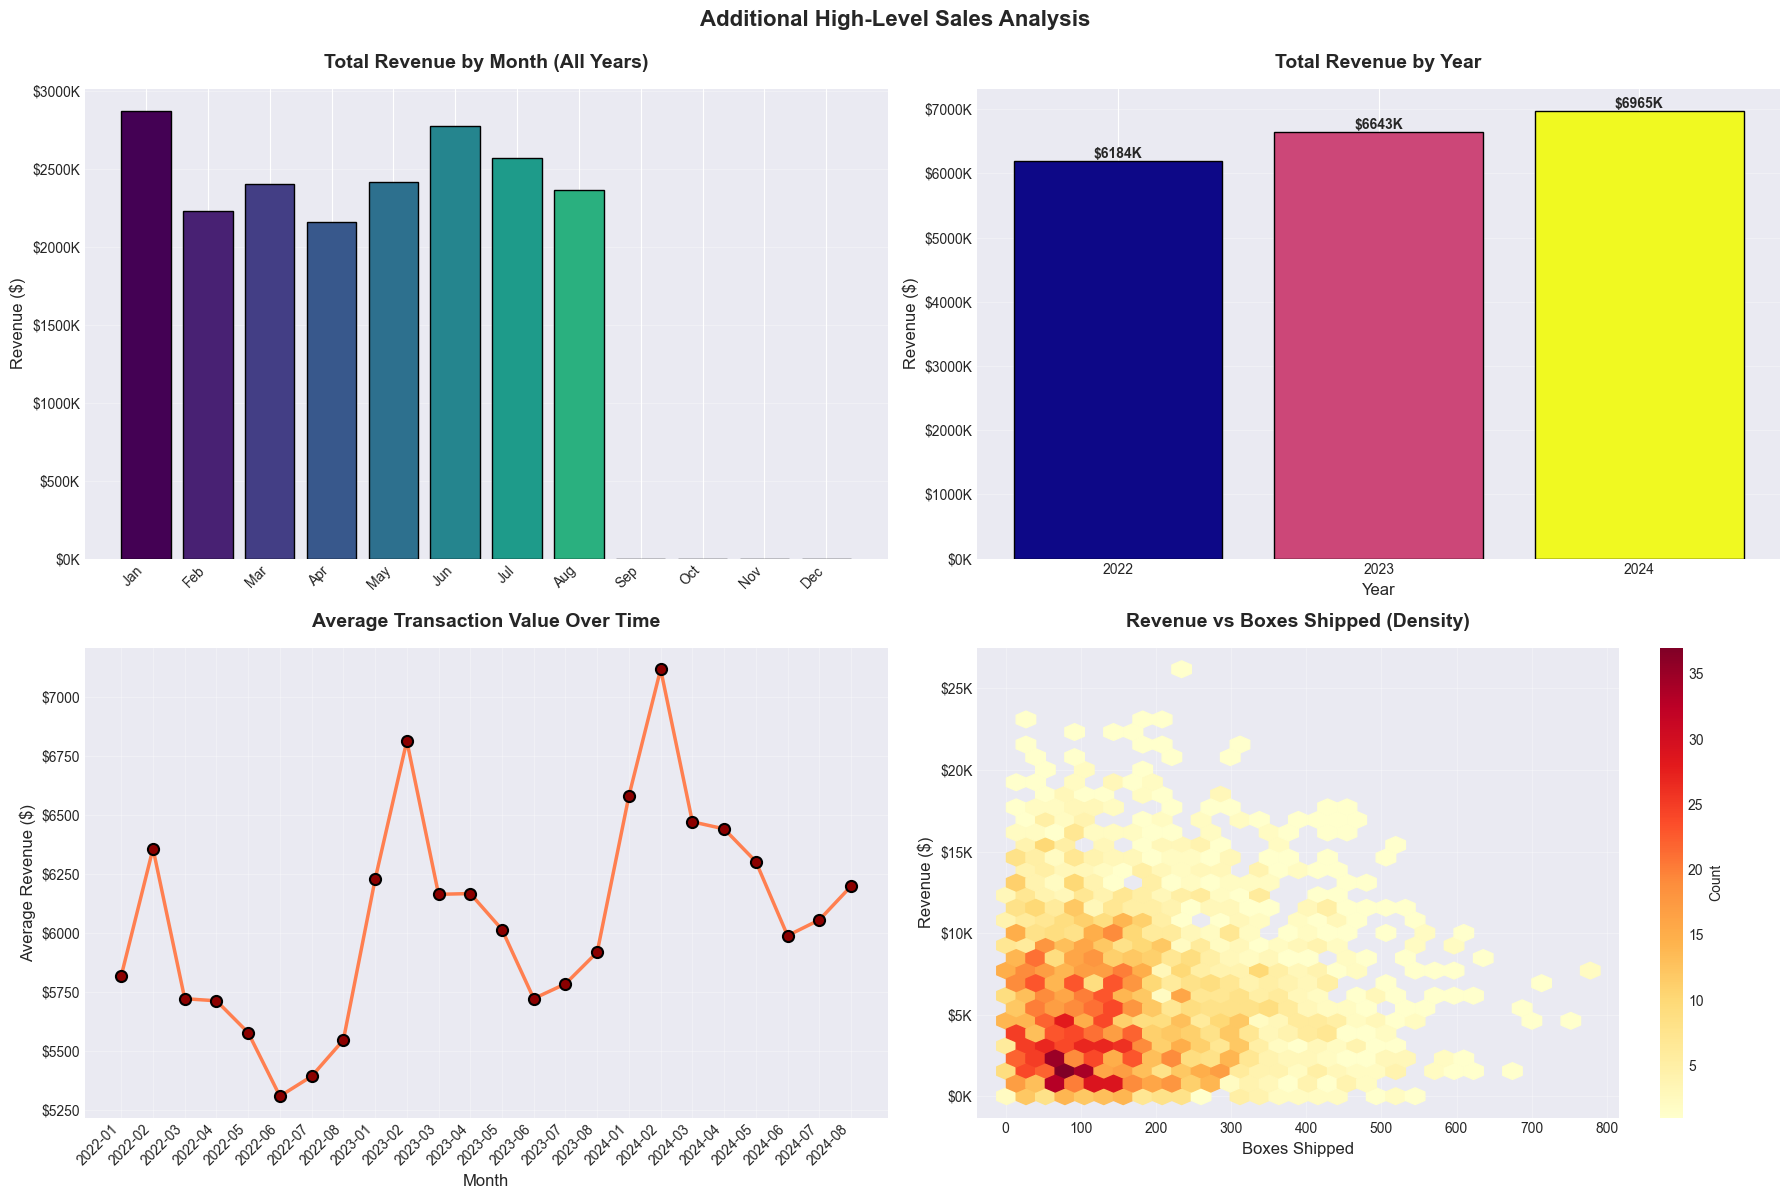

In [29]:
# Additional High-Level Analysis: Revenue by Month
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Revenue by Month (All Years Combined)
ax1 = axes[0, 0]
monthly_agg = df_clean.groupby('Month')['Amount'].sum()
# Ensure all 12 months are included, filling missing ones with 0
monthly_agg_full = monthly_agg.reindex(range(1, 13), fill_value=0).sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax1.bar(range(1, 13), monthly_agg_full.values, color=plt.cm.viridis(np.linspace(0, 1, 12)), edgecolor='black')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(month_names, rotation=45, ha='right')
ax1.set_title('Total Revenue by Month (All Years)', fontsize=14, fontweight='bold', pad=15)
ax1.set_ylabel('Revenue ($)', fontsize=12)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax1.grid(True, alpha=0.3, axis='y')

# 2. Year-over-Year Comparison
ax2 = axes[0, 1]
yearly_revenue = df_clean.groupby('Year')['Amount'].sum()
ax2.bar(yearly_revenue.index.astype(str), yearly_revenue.values, 
        color=plt.cm.plasma(np.linspace(0, 1, len(yearly_revenue))), edgecolor='black')
ax2.set_title('Total Revenue by Year', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Revenue ($)', fontsize=12)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax2.grid(True, alpha=0.3, axis='y')
for i, v in enumerate(yearly_revenue.values):
    ax2.text(i, v, f'${v/1000:.0f}K', ha='center', va='bottom', fontweight='bold')

# 3. Average Transaction Value Over Time
ax3 = axes[1, 0]
monthly_avg = df_clean.groupby('Year_Month')['Amount'].mean()
monthly_avg.index = monthly_avg.index.astype(str)
ax3.plot(monthly_avg.index, monthly_avg.values, marker='o', linewidth=2.5, markersize=8, 
         color='coral', markerfacecolor='darkred', markeredgecolor='black', markeredgewidth=1.5)
ax3.set_title('Average Transaction Value Over Time', fontsize=14, fontweight='bold', pad=15)
ax3.set_xlabel('Month', fontsize=12)
ax3.set_ylabel('Average Revenue ($)', fontsize=12)
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3)
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:.0f}'))
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 4. Revenue vs Boxes Shipped Correlation
ax4 = axes[1, 1]
# Create a hexbin plot for better visualization of density
hb = ax4.hexbin(df_clean['Boxes Shipped'], df_clean['Amount'], gridsize=30, cmap='YlOrRd', mincnt=1)
ax4.set_title('Revenue vs Boxes Shipped (Density)', fontsize=14, fontweight='bold', pad=15)
ax4.set_xlabel('Boxes Shipped', fontsize=12)
ax4.set_ylabel('Revenue ($)', fontsize=12)
ax4.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
cb = plt.colorbar(hb, ax=ax4)
cb.set_label('Count', fontsize=10)
ax4.grid(True, alpha=0.3)

plt.suptitle('Additional High-Level Sales Analysis', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

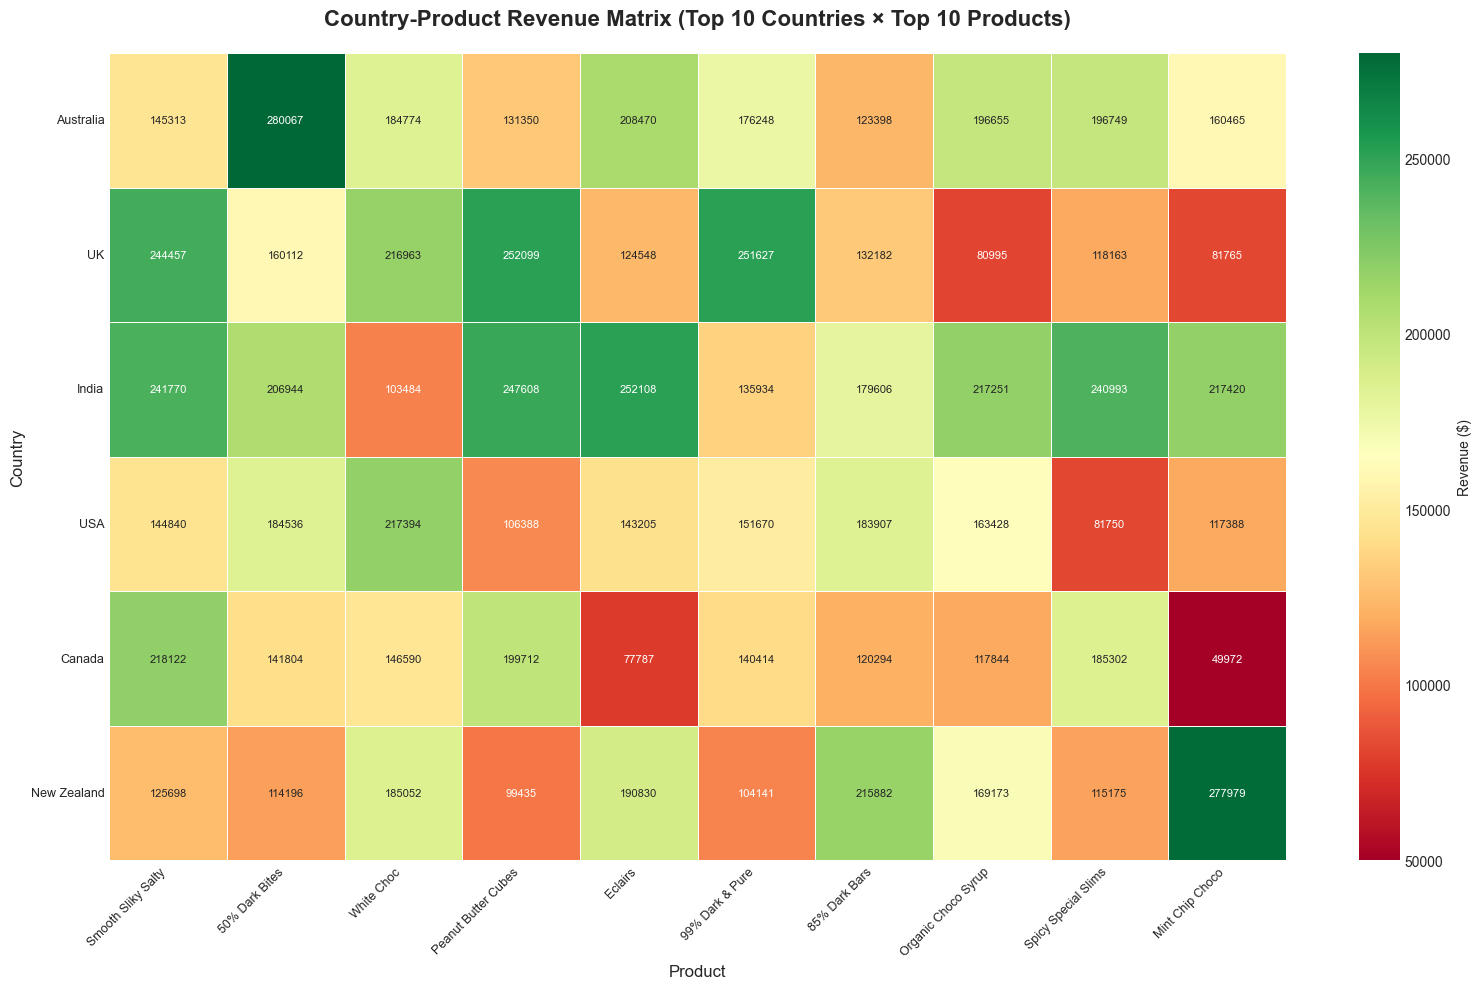

In [30]:
# Country-Product Performance Matrix
fig, ax = plt.subplots(figsize=(16, 10))

# Create a pivot table for country-product revenue
country_product = df_clean.groupby(['Country', 'Product'])['Amount'].sum().reset_index()
pivot_table = country_product.pivot(index='Country', columns='Product', values='Amount')

# Select top countries and products for better visualization
top_countries_list = df_clean.groupby('Country')['Amount'].sum().sort_values(ascending=False).head(10).index.tolist()
top_products_list = df_clean.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(10).index.tolist()

# Filter pivot table, handling missing combinations
pivot_filtered = pivot_table.reindex(index=top_countries_list, columns=top_products_list)
# Fill NaN with 0 for better visualization
pivot_filtered = pivot_filtered.fillna(0)

sns.heatmap(pivot_filtered, annot=True, fmt='.0f', cmap='RdYlGn', ax=ax, 
            cbar_kws={'label': 'Revenue ($)'}, linewidths=0.5, 
            annot_kws={'size': 8}, square=False, mask=(pivot_filtered == 0))
ax.set_title('Country-Product Revenue Matrix (Top 10 Countries × Top 10 Products)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Product', fontsize=12)
ax.set_ylabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

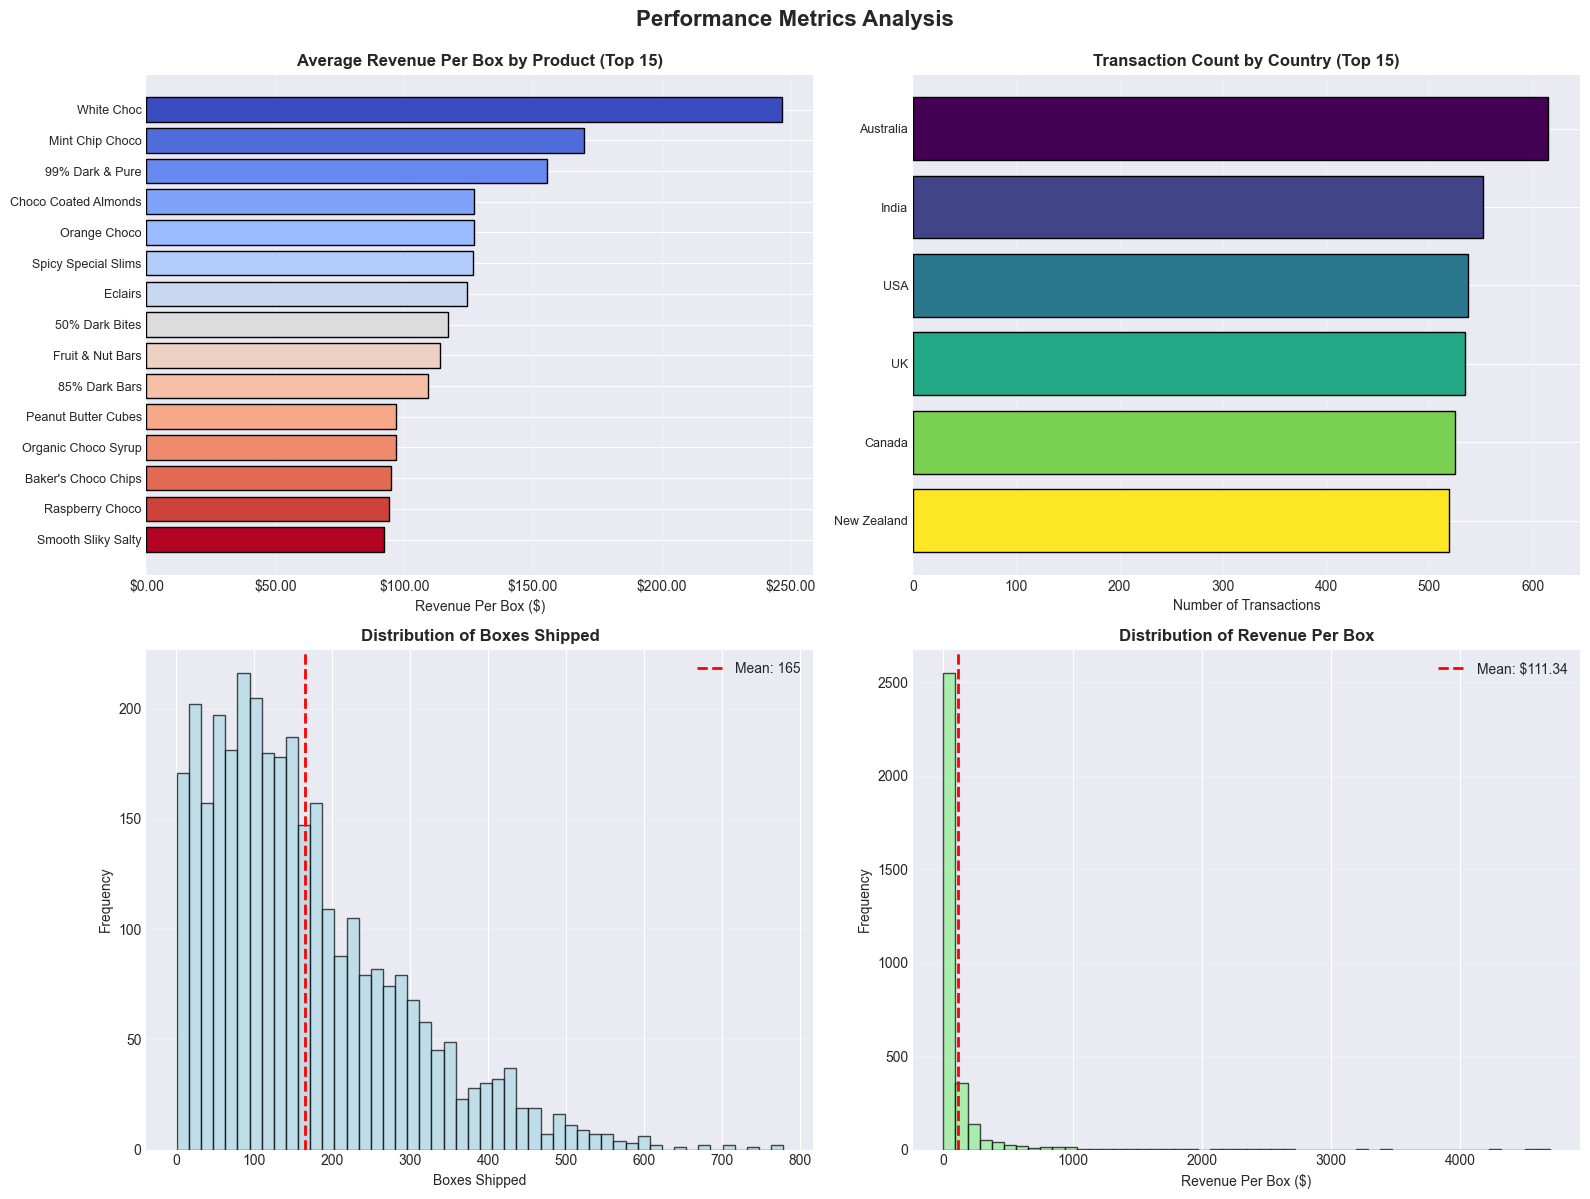

In [31]:
# Performance Metrics Summary
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Revenue Per Box by Product (Top 15)
ax1 = axes[0, 0]
revenue_per_box = df_clean.groupby('Product')['Revenue_Per_Box'].mean().sort_values(ascending=False).head(15)
colors = plt.cm.coolwarm(np.linspace(0, 1, len(revenue_per_box)))
ax1.barh(range(len(revenue_per_box)), revenue_per_box.values, color=colors, edgecolor='black')
ax1.set_yticks(range(len(revenue_per_box)))
ax1.set_yticklabels([p[:25] + '...' if len(p) > 25 else p for p in revenue_per_box.index], fontsize=9)
ax1.set_title('Average Revenue Per Box by Product (Top 15)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Revenue Per Box ($)', fontsize=10)
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:.2f}'))
ax1.invert_yaxis()
ax1.grid(True, alpha=0.3, axis='x')

# 2. Transaction Count by Country
ax2 = axes[0, 1]
transaction_count = df_clean.groupby('Country')['Amount'].count().sort_values(ascending=False).head(15)
colors = plt.cm.viridis(np.linspace(0, 1, len(transaction_count)))
ax2.barh(range(len(transaction_count)), transaction_count.values, color=colors, edgecolor='black')
ax2.set_yticks(range(len(transaction_count)))
ax2.set_yticklabels(transaction_count.index, fontsize=9)
ax2.set_title('Transaction Count by Country (Top 15)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Number of Transactions', fontsize=10)
ax2.invert_yaxis()
ax2.grid(True, alpha=0.3, axis='x')

# 3. Boxes Shipped Distribution
ax3 = axes[1, 0]
ax3.hist(df_clean['Boxes Shipped'], bins=50, color='lightblue', edgecolor='black', alpha=0.7)
ax3.set_title('Distribution of Boxes Shipped', fontsize=12, fontweight='bold')
ax3.set_xlabel('Boxes Shipped', fontsize=10)
ax3.set_ylabel('Frequency', fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')
ax3.axvline(df_clean['Boxes Shipped'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {df_clean["Boxes Shipped"].mean():.0f}')
ax3.legend()

# 4. Revenue Per Box Distribution
ax4 = axes[1, 1]
valid_revenue_per_box = df_clean['Revenue_Per_Box'].dropna()
ax4.hist(valid_revenue_per_box, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
ax4.set_title('Distribution of Revenue Per Box', fontsize=12, fontweight='bold')
ax4.set_xlabel('Revenue Per Box ($)', fontsize=10)
ax4.set_ylabel('Frequency', fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')
ax4.axvline(valid_revenue_per_box.mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: ${valid_revenue_per_box.mean():.2f}')
ax4.legend()

plt.suptitle('Performance Metrics Analysis', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## Summary Statistics

In [32]:
# Final Summary
print("=" * 70)
print("FINAL SUMMARY STATISTICS")
print("=" * 70)

print(f"\n📊 Dataset Overview:")
print(f"   • Total Records: {len(df_clean):,}")
print(f"   • Date Range: {df_clean['Date'].min().strftime('%B %d, %Y')} to {df_clean['Date'].max().strftime('%B %d, %Y')}")
print(f"   • Total Revenue: ${df_clean['Amount'].sum():,.2f}")
print(f"   • Total Boxes Shipped: {df_clean['Boxes Shipped'].sum():,}")

print(f"\n🏆 Top Performers:")
print(f"   • Top Product: {df_clean.groupby('Product')['Amount'].sum().idxmax()} (${df_clean.groupby('Product')['Amount'].sum().max():,.2f})")
print(f"   • Top Country: {df_clean.groupby('Country')['Amount'].sum().idxmax()} (${df_clean.groupby('Country')['Amount'].sum().max():,.2f})")
print(f"   • Top Sales Person: {df_clean.groupby('Sales Person')['Amount'].sum().idxmax()} (${df_clean.groupby('Sales Person')['Amount'].sum().max():,.2f})")

print(f"\n📈 Key Metrics:")
print(f"   • Average Transaction Value: ${df_clean['Amount'].mean():,.2f}")
print(f"   • Median Transaction Value: ${df_clean['Amount'].median():,.2f}")
print(f"   • Average Boxes per Transaction: {df_clean['Boxes Shipped'].mean():.2f}")
print(f"   • Average Revenue per Box: ${df_clean['Revenue_Per_Box'].mean():.2f}")

print(f"\n📅 Temporal Insights:")
print(f"   • Best Month: {df_clean.groupby('Month_Name')['Amount'].sum().idxmax()} (${df_clean.groupby('Month_Name')['Amount'].sum().max():,.2f})")
print(f"   • Best Year: {df_clean.groupby('Year')['Amount'].sum().idxmax()} (${df_clean.groupby('Year')['Amount'].sum().max():,.2f})")
print(f"   • Best Quarter: Q{df_clean.groupby('Quarter')['Amount'].sum().idxmax()} (${df_clean.groupby('Quarter')['Amount'].sum().max():,.2f})")

print("\n" + "=" * 70)

FINAL SUMMARY STATISTICS

📊 Dataset Overview:
   • Total Records: 3,282
   • Date Range: January 03, 2022 to August 31, 2024
   • Total Revenue: $19,791,571.86
   • Total Boxes Shipped: 540,437

🏆 Top Performers:
   • Top Product: Smooth Sliky Salty ($1,120,201.09)
   • Top Country: Australia ($3,646,444.35)
   • Top Sales Person: Ches Bonnell ($1,022,599.96)

📈 Key Metrics:
   • Average Transaction Value: $6,030.34
   • Median Transaction Value: $5,225.50
   • Average Boxes per Transaction: 164.67
   • Average Revenue per Box: $111.34

📅 Temporal Insights:
   • Best Month: January ($2,868,712.59)
   • Best Year: 2024 ($6,964,568.90)
   • Best Quarter: Q1 ($7,505,578.78)

